# Moire and Curvature Visualization

This notebook demonstrates how to generate and display Moiré patterns and mean curvature images from a PLY file.

In [1]:
import os
from moire import get_moire_img
from curvature import get_curvature_img
from utils.mesh import get_output_path
from matplotlib import pyplot as plt

# ply_path = "data/21-10332/STD_fuse_mesh.ply"
# ply_path = "data/16-10363/STD_fuse_mesh.ply"
# ply_path = "data/21-10282/STD_fuse_mesh.ply"
# ply_path = "data/23-10130/STD_fuse_mesh.ply"
# ply_path = "data/22-10228/STD_fuse_mesh.ply"
# ply_path = "data/23-10673/STD_fuse_mesh.poy"
ply_path = 'data/demo6/fuse_mesh.ply'
# ply_path = 'data/demo3/fuse_mesh.ply'

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## 1. Generate Moiré Pattern Image

In [2]:
point_cloud_path = ply_path.replace("_mesh", "")

get_moire_img(file_path=point_cloud_path, is_save=True, num_levels=200)

moire_image_path = get_output_path(point_cloud_path, output_type="moire")

2025-07-02 20:03:46.503 | INFO     | moire:get_moire_img:87 - Processing data/demo6/fuse.ply


[Open3D WARNING] geometry::TriangleMesh appears to be a geometry::PointCloud (only contains vertices, but no triangles).


2025-07-02 20:03:51.009 | SUCCESS  | utils.mesh:save_img:173 - Saved image to out/moire/demo6_fuse.png


## 2. Generate Mean Curvature Image

In [3]:
get_curvature_img(
    ply_path=ply_path,
    clip_range=(-0.015, 0.025),
    curv_type="mean",
)

mean_curvature_image_path = get_output_path(ply_path, output_type="mean")

2025-07-02 20:03:51.366 | INFO     | curvature:visualize_curvature:44 - Original face curvature range: (-6.444648338319947, 4.26945958378339)
2025-07-02 20:03:51.367 | INFO     | curvature:visualize_curvature:49 - Clipping range: (-0.015, 0.025) for color mapping.
2025-07-02 20:03:51.368 | INFO     | curvature:visualize_curvature:64 - Creating 2D face plot
2025-07-02 20:03:53.056 | SUCCESS  | utils.mesh:save_img:173 - Saved image to out/mean/demo6_fuse_mesh.png


# 3. Display Output Images

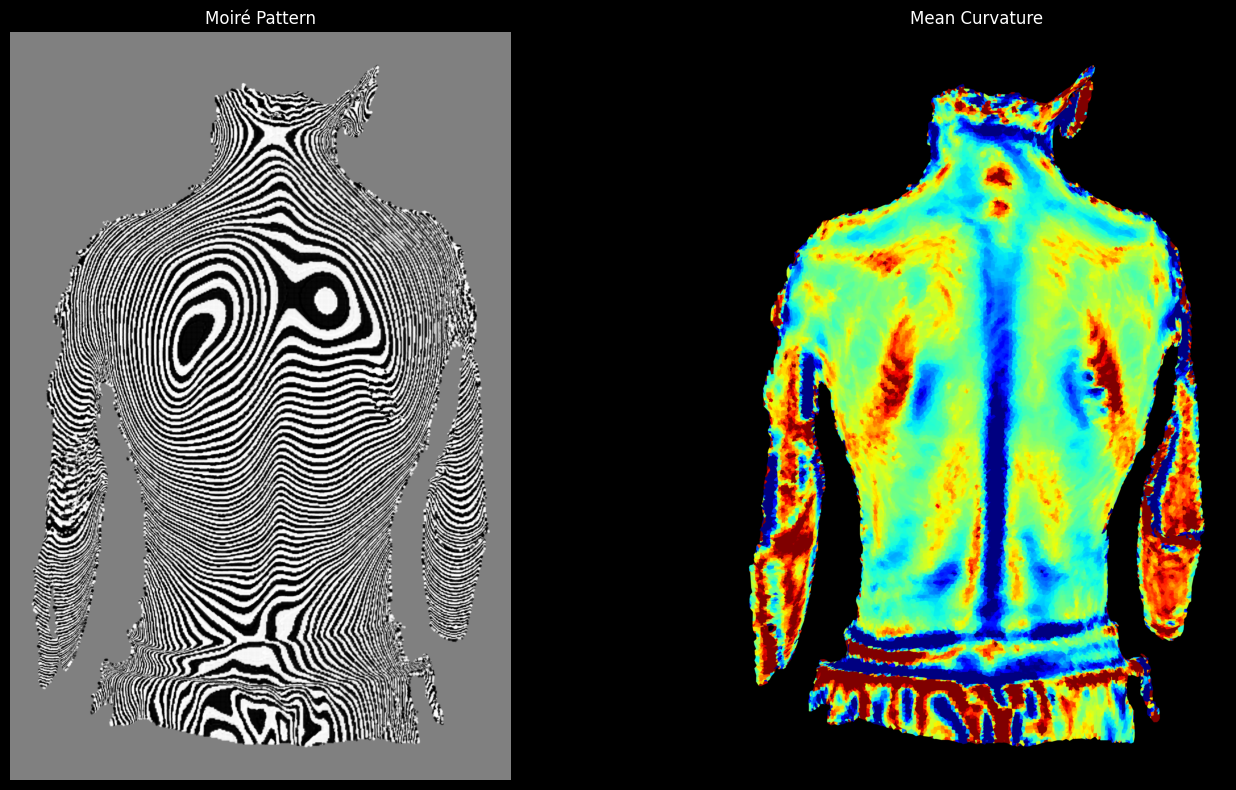

In [4]:
dir_path = os.path.dirname(ply_path)
for file_name in os.listdir(dir_path):
    if file_name.startswith("PA") and file_name.endswith(".jpg"):
        pa_img_path = os.path.join(dir_path, file_name)
        break
else:
    pa_img_path = None
    
if not pa_img_path:
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(plt.imread(moire_image_path))
    plt.title("Moiré Pattern")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(plt.imread(mean_curvature_image_path))
    plt.title("Mean Curvature")
    plt.axis("off")
    plt.tight_layout()
    plt.show()
else:
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(plt.imread(moire_image_path))
    plt.title("Moiré Pattern")
    plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(plt.imread(mean_curvature_image_path))
    plt.title("Mean Curvature")
    plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(plt.imread(pa_img_path))
    plt.title("Xray Image")
    plt.axis("off")
    plt.tight_layout()
    plt.show()